# Basic usage of the ``embeam`` library #

## A NOTE BEFORE STARTING ##

Since the ``embeam`` git repository tracks this notebook under its original
basename ``basic_usage.ipynb``, we recommend that you copy the original
notebook and rename it to any other basename that is not one of the original
basenames that appear in the ``<root>/examples`` directory before executing any
of the notebook cells below, where ``<root>`` is the root of the ``embeam``
repository. This way you can explore the notebook by executing and modifying
cells without changing the original notebook, which is being tracked by git.

## Table of contents ##

- [Import necessary modules](#Import-necessary-modules)
- [Introduction](#Introduction)
- [Using the ``embeam.wavelength`` function](#Using-the-embeam.wavelength-function)
- [Using the ``embeam.coherent.Aberration`` class](#Using-the-embeam.coherent.Aberration-class)
- [Using the ``embeam.coherent.PhaseDeviation`` class](#Using-the-embeam.coherent.PhaseDeviation-class)
- [Using the ``embeam.gun.ModelParams`` class](#Using-the-embeam.gun.ModelParams-class)
- [Using the ``embeam.lens.ModelParams`` class](#Using-the-embeam.lens.ModelParams-class)
- [Using the ``embeam.stem.probe.ModelParams`` class](#Using-the-embeam.stem.probe.ModelParams-class)
- [Using the ``embeam.stem.probe.kspace.Wavefunction`` class](#Using-the-embeam.stem.probe.kspace.Wavefunction-class)
- [Using the ``embeam.stem.probe.kspace.Intensity`` class](#Using-the-embeam.stem.probe.kspace.Intensity-class)
- [Using the ``embeam.stem.probe.symmetric.rspace.Wavefunction`` class](#Using-the-embeam.stem.probe.symmetric.rspace.Wavefunction-class)
- [Using the ``embeam.stem.probe.symmetric.rspace.Intensity`` class](#Using-the-embeam.stem.probe.symmetric.rspace.Intensity-class)
- [Using the ``embeam.stem.probe.discretized.kspace.Wavefunction`` class](#Using-the-embeam.stem.probe.discretized.kspace.Wavefunction-class)
- [Using the ``embeam.stem.probe.discretized.kspace.Intensity`` class](#Using-the-embeam.stem.probe.discretized.kspace.Intensity-class)
- [Using the ``embeam.stem.probe.discretized.symmetric.rspace.Wavefunction`` class](#Using-the-embeam.stem.probe.discretized.symmetric.rspace.Wavefunction-class)
- [Using the ``embeam.stem.probe.discretized.symmetric.rspace.Intensity`` class](#Using-the-embeam.stem.probe.discretized.symmetric.rspace.Intensity-class)
- [Using the ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction`` class](#Using-the-embeam.stem.probe.discretized.periodic.rspace.Wavefunction-class)
- [Using the ``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class](#Using-the-embeam.stem.probe.discretized.periodic.rspace.Intensity-class)
- [Using the ``embeam.stem.probe.resolution.rise_distance`` function](#Using-the-embeam.stem.probe.resolution.rise_distance-function)
- [Using the ``embeam.stem.probe.resolution.information`` function](#Using-the-embeam.stem.probe.resolution.information-function)

## Import necessary modules ##

In [1]:
# For special mathematical constants.
import numpy as np

# For setting various visualization parameters.
import matplotlib.pyplot as plt



# The library that is the subject of this demonstration. Users may receive a
# warning message about ``pyopencl`` upon importing ``embeam``. This message can
# be safely ignored.
import embeam

## Introduction ##

In this notebook, we demonstrate how one can use each function and class in the
``embeam`` library.

In order to execute the cells in this notebook as intended, a set of Python
libraries need to be installed in the Python environment within which the cells
of the notebook are to be executed. For this particular notebook, users need to
install:

    embeam
    jupyter

Users can install these libraries either via `pip`:

    pip install embeam[examples]

or `conda`:

    conda install -y embeam jupyter -c conda-forge

You can find the documentation for the emicroml library
[here](https://mrfitzpa.github.io/embeam/_autosummary/embeam.html). It is
recommended that you consult the documentation of this library as you explore
the notebook. Moreover, users should execute the cells in the order that they
appear, i.e. from top to bottom, as some cells reference variables that are set
in other cells above them. **Users should make sure to navigate the
documentation for the version of emicroml that they are currently using.**

## Using the ``embeam.wavelength`` function ##

Calculate the relativistic electron beam wavelength from the energy of a
coherent beam.

In [2]:
# Calculate the relativistic electron beam wavelength from the energy of a
# coherent beam.
mean_beam_energy = 20  # In units of keVs.
wavelength = embeam.wavelength(beam_energy=mean_beam_energy)  # In units of Å.
wavelength

0.08588510974887799

In [3]:
mean_beam_energy = 20
wavelength = embeam.wavelength(beam_energy=mean_beam_energy)
wavelength

0.08588510974887799

## Using the ``embeam.coherent.Aberration`` class ##

Specify a set of coherent lens aberrations.

In [4]:
# Specify defocus.
m = 2  # Radial order of aberration.
n = 0  # Azimuthal order of aberration.
df = -5000  # "Magnitude" of aberration in units of Å.
C_2_0_mag = (2*np.pi*df)/(m*wavelength)  # "Magnitude" in dimensionless units.
C_2_0_ang = 0  # "Azimuthal phase" of aberration.
defocus_aberration = embeam.coherent.Aberration(m=m, 
                                                n=n, 
                                                C_mag=C_2_0_mag, 
                                                C_ang=C_2_0_ang)

# Specify spherical aberration.
m = 4  # Radial order of aberration.
n = 0  # Azimuthal order of aberration.
C_s = 8e-3/1e-10  # "Magnitude" of aberration in units of Å.
C_4_0_mag = (2*np.pi*C_s)/(m*wavelength)  # "Magnitude" in dimensionless units.
C_4_0_ang = 0  # "Azimuthal phase" of aberration.
spherical_aberration = embeam.coherent.Aberration(m=m, 
                                                  n=n, 
                                                  C_mag=C_4_0_mag, 
                                                  C_ang=C_4_0_ang)

# Specify 3-fold astigmatism.
m = 3 # Radial order of aberration.
n = 3 # Azimuthal order of aberration.
C_3_3_mag = 75000  # "Magnitude" in dimensionless units.
C_3_3_ang = 0.75  # "Azimuthal phase" of aberration.
astigmatism_aberration = embeam.coherent.Aberration(m=m, 
                                                    n=n, 
                                                    C_mag=C_3_3_mag, 
                                                    C_ang=C_3_3_ang)

Note that the ``embeam.coherent.Aberration`` class is "updatable",
"pre-serializable", and "de-pre-serializable", as defined in the documentation
of the ``fancytypes`` library. See
[here](https://mrfitzpa.github.io/fancytypes/_build/html/index.html) for the
documentation for the ``fancytypes`` library.

In [5]:
# An example of pre-serialization.
serializable_rep = astigmatism_aberration.pre_serialize()
serializable_rep

{'m': 3, 'n': 3, 'C_mag': 75000.0, 'C_ang': 0.75}

In [6]:
# Reconstruct the object ``astigmatism_aberration`` via de-pre-serialization.
astigmatism_aberration = \
    embeam.coherent.Aberration.de_pre_serialize(serializable_rep)

Which aberrations above are azimuthally symmetric?

In [7]:
defocus_aberration.is_azimuthally_symmetric

True

In [8]:
spherical_aberration.is_azimuthally_symmetric

True

In [9]:
astigmatism_aberration.is_azimuthally_symmetric

False

Instances of classes that are derived from ``fancytypes`` classes store
so-called "core attributes", which are attributes that are the same as the
construction parameters, except that their values might have been updated since
construction.

In [10]:
astigmatism_aberration.core_attrs

{'m': 3, 'n': 3, 'C_mag': 75000.0, 'C_ang': 0.75}

## Using the ``embeam.coherent.PhaseDeviation`` class ##

Here we consider the phase deviations due to two different sets of coherent lens
aberrations.

In [11]:
azimuthally_symmetric_and_coherent_aberrations = \
    (defocus_aberration, spherical_aberration)
kwargs = \
    {"beam_energy": mean_beam_energy, 
     "coherent_aberrations": azimuthally_symmetric_and_coherent_aberrations, 
     "defocal_offset": 0}
azimuthally_symmetric_phase_deviation = \
    embeam.coherent.PhaseDeviation(**kwargs)

azimuthally_asymmetric_and_coherent_aberrations = \
    (defocus_aberration, spherical_aberration, astigmatism_aberration)
kwargs = \
    {"beam_energy": mean_beam_energy, 
     "coherent_aberrations": azimuthally_asymmetric_and_coherent_aberrations, 
     "defocal_offset": 0}
azimuthally_asymmetric_phase_deviation = \
    embeam.coherent.PhaseDeviation(**kwargs)

Note that the ``embeam.coherent.PhaseDeviation`` class is also updatable,
pre-serializable, and de-pre-serializable.

Which phase deviations above are azimuthally symmetric?

In [12]:
azimuthally_symmetric_phase_deviation.is_azimuthally_symmetric

True

In [13]:
azimuthally_asymmetric_phase_deviation.is_azimuthally_symmetric

False

Evaluate the phase deviations at given Fourier coordinates.

In [14]:
k_x = 0.01  # In units of 1/Å.
k_y = 0.02  # In units of 1/Å.
azimuthally_symmetric_phase_deviation.eval(k_x=k_x, k_y=k_y)

np.float64(-0.6546377640955731)

In [15]:
azimuthally_asymmetric_phase_deviation.eval(k_x=k_x, k_y=k_y)

np.float64(-0.6543833893060503)

## Using the ``embeam.gun.ModelParams`` class ##

Here we consider the model parameters of one electron gun.

In [16]:
intrinsic_energy_spread = 0.6e-3  # In units of keVs.
accel_voltage_spread = 0  # In units of keVs.

kwargs = {"mean_beam_energy": mean_beam_energy, 
          "intrinsic_energy_spread": intrinsic_energy_spread, 
          "accel_voltage_spread": accel_voltage_spread}
gun_model_params = embeam.gun.ModelParams(**kwargs)

Note that the ``embeam.gun.ModelParams`` class is also updatable,
pre-serializable, and de-pre-serializable.

## Using the ``embeam.lens.ModelParams`` class ##

Here we consider the model parameters of four different lenses.

In [17]:
C_c_1 = 0  # In units of mm.
C_c_2 = 8  # In units of mm.
mean_current = 50  # In units of pA.
std_dev_current = 0  # In units of pA.

kwargs = \
    {"coherent_aberrations": azimuthally_symmetric_and_coherent_aberrations, 
     "chromatic_aberration_coef": C_c_1, 
     "mean_current": mean_current, 
     "std_dev_current": std_dev_current}
azimuthally_symmetric_and_coherent_lens_model_params = \
    embeam.lens.ModelParams(**kwargs)

kwargs = \
    {"coherent_aberrations": azimuthally_asymmetric_and_coherent_aberrations, 
     "chromatic_aberration_coef": C_c_1, 
     "mean_current": mean_current, 
     "std_dev_current": std_dev_current}
azimuthally_asymmetric_and_coherent_lens_model_params = \
    embeam.lens.ModelParams(**kwargs)

kwargs = \
    {"coherent_aberrations": azimuthally_symmetric_and_coherent_aberrations, 
     "chromatic_aberration_coef": C_c_2, 
     "mean_current": mean_current, 
     "std_dev_current": std_dev_current}
azimuthally_symmetric_and_incoherent_lens_model_params = \
    embeam.lens.ModelParams(**kwargs)

kwargs = \
    {"coherent_aberrations": azimuthally_asymmetric_and_coherent_aberrations, 
     "chromatic_aberration_coef": C_c_2, 
     "mean_current": mean_current, 
     "std_dev_current": std_dev_current}
azimuthally_asymmetric_and_incoherent_lens_model_params = \
    embeam.lens.ModelParams(**kwargs)

Note that the ``embeam.lens.ModelParams`` class is also updatable,
pre-serializable, and de-pre-serializable.

Which lenses, specified by the model parameters, will form probes that are
azimuthally symmetric?

In [18]:
azimuthally_symmetric_and_coherent_lens_model_params.is_azimuthally_symmetric

True

In [19]:
azimuthally_asymmetric_and_coherent_lens_model_params.is_azimuthally_symmetric

False

In [20]:
azimuthally_symmetric_and_incoherent_lens_model_params.is_azimuthally_symmetric

True

In [21]:
azimuthally_asymmetric_and_incoherent_lens_model_params.is_azimuthally_symmetric

False

## Using the ``embeam.stem.probe.ModelParams`` class ##

Here we consider the model parameters of four different probes.

In [22]:
convergence_semiangle = 4.84  # In units of mrads.
defocal_offset_supersampling = 9  # Dimensionless integer.

kwargs = \
    {"lens_model_params": \
     azimuthally_symmetric_and_coherent_lens_model_params, 
     "convergence_semiangle": convergence_semiangle,
     "gun_model_params": gun_model_params, 
     "defocal_offset_supersampling": defocal_offset_supersampling}
azimuthally_symmetric_and_coherent_probe_model_params = \
    embeam.stem.probe.ModelParams(**kwargs)

kwargs = \
    {"lens_model_params": \
     azimuthally_asymmetric_and_coherent_lens_model_params, 
     "convergence_semiangle": convergence_semiangle,
     "gun_model_params": gun_model_params, 
     "defocal_offset_supersampling": defocal_offset_supersampling}
azimuthally_asymmetric_and_coherent_probe_model_params = \
    embeam.stem.probe.ModelParams(**kwargs)

kwargs = \
    {"lens_model_params": \
     azimuthally_symmetric_and_incoherent_lens_model_params, 
     "convergence_semiangle": convergence_semiangle,
     "gun_model_params": gun_model_params, 
     "defocal_offset_supersampling": defocal_offset_supersampling}
azimuthally_symmetric_and_incoherent_probe_model_params = \
    embeam.stem.probe.ModelParams(**kwargs)

kwargs = \
    {"lens_model_params": \
     azimuthally_asymmetric_and_incoherent_lens_model_params, 
     "convergence_semiangle": convergence_semiangle,
     "gun_model_params": gun_model_params, 
     "defocal_offset_supersampling": defocal_offset_supersampling}
azimuthally_asymmetric_and_incoherent_probe_model_params = \
    embeam.stem.probe.ModelParams(**kwargs)

Note that the ``embeam.stem.probe.ModelParams`` class is also updatable,
pre-serializable, and de-pre-serializable.

Which probes, specified by the model parameters, are azimuthally symmetric?

In [23]:
azimuthally_symmetric_and_coherent_probe_model_params.is_azimuthally_symmetric

True

In [24]:
azimuthally_asymmetric_and_coherent_probe_model_params.is_azimuthally_symmetric

False

In [25]:
azimuthally_symmetric_and_incoherent_probe_model_params.is_azimuthally_symmetric

True

In [26]:
azimuthally_asymmetric_and_incoherent_probe_model_params.is_azimuthally_symmetric

False

Which probes, specified by the model parameters, are coherent?

In [27]:
azimuthally_symmetric_and_coherent_probe_model_params.is_coherent

True

In [28]:
azimuthally_asymmetric_and_coherent_probe_model_params.is_coherent

True

In [29]:
azimuthally_symmetric_and_incoherent_probe_model_params.is_coherent

False

In [30]:
azimuthally_asymmetric_and_incoherent_probe_model_params.is_coherent

False

## Using the ``embeam.stem.probe.kspace.Wavefunction`` class ##

Here we consider the $k$-space wavefunctions of the two coherent probes specified above.

In [31]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params}
azimuthally_symmetric_kspace_probe_wavefunction = \
    embeam.stem.probe.kspace.Wavefunction(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params}
azimuthally_asymmetric_kspace_probe_wavefunction = \
    embeam.stem.probe.kspace.Wavefunction(**kwargs)

Note that the ``embeam.stem.probe.kspace.Wavefunction`` class is also updatable,
pre-serializable, and de-pre-serializable.

Which $k$-space wavefunctions are azimuthally symmetric?

In [32]:
azimuthally_symmetric_kspace_probe_wavefunction.is_azimuthally_symmetric

True

In [33]:
azimuthally_asymmetric_kspace_probe_wavefunction.is_azimuthally_symmetric

False

Evaluate the $k$-space wavefunctions at given Fourier coordinates.

In [34]:
azimuthally_symmetric_kspace_probe_wavefunction.eval(k_x=k_x, k_y=k_y)

np.complex128(7.94177914571888+6.095699253812931j)

In [35]:
azimuthally_asymmetric_kspace_probe_wavefunction.eval(k_x=k_x, k_y=k_y)

np.complex128(7.943329480974342+6.093678868220307j)

Note that you must pass probe model parameters of a coherent probe in order to
construct a $k$-space wavefunction object. The following code block deliberately
raises an exception.

In [36]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params}
_ = \
    embeam.stem.probe.kspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify a coherent probe model.

## Using the ``embeam.stem.probe.kspace.Intensity`` class ##

Here we consider the $k$-space fractional intensities of the four probes
specified above.

In [37]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params}
azimuthally_symmetric_and_coherent_kspace_probe_intensity = \
    embeam.stem.probe.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params}
azimuthally_asymmetric_and_coherent_kspace_probe_intensity = \
    embeam.stem.probe.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params}
azimuthally_symmetric_and_incoherent_kspace_probe_intensity = \
    embeam.stem.probe.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_incoherent_probe_model_params}
azimuthally_asymmetric_and_incoherent_kspace_probe_intensity = \
    embeam.stem.probe.kspace.Intensity(**kwargs)

Note that the ``embeam.stem.probe.kspace.Intensity`` class is also updatable,
pre-serializable, and de-pre-serializable.

Which $k$-space fractional intensities are azimuthally symmetric?

In [38]:
obj_alias = azimuthally_symmetric_and_coherent_kspace_probe_intensity
obj_alias.is_azimuthally_symmetric

True

In [39]:
obj_alias = azimuthally_asymmetric_and_coherent_kspace_probe_intensity
obj_alias.is_azimuthally_symmetric

False

In [40]:
obj_alias = azimuthally_symmetric_and_incoherent_kspace_probe_intensity
obj_alias.is_azimuthally_symmetric

True

In [41]:
obj_alias = azimuthally_asymmetric_and_incoherent_kspace_probe_intensity
obj_alias.is_azimuthally_symmetric

False

Which $k$-space fractional intensities are those of coherent probes?

In [42]:
azimuthally_symmetric_and_coherent_kspace_probe_intensity.is_coherent

True

In [43]:
azimuthally_asymmetric_and_coherent_kspace_probe_intensity.is_coherent

True

In [44]:
azimuthally_symmetric_and_incoherent_kspace_probe_intensity.is_coherent

False

In [45]:
azimuthally_asymmetric_and_incoherent_kspace_probe_intensity.is_coherent

False

Evaluate the $k$-space fractional intensities at given Fourier coordinates.

In [46]:
azimuthally_symmetric_and_coherent_kspace_probe_intensity.eval(k_x=k_x, 
                                                               k_y=k_y)

np.float64(100.22940539231082)

In [47]:
azimuthally_asymmetric_and_coherent_kspace_probe_intensity.eval(k_x=k_x, 
                                                                k_y=k_y)

np.float64(100.22940539231082)

In [48]:
azimuthally_symmetric_and_incoherent_kspace_probe_intensity.eval(k_x=k_x, 
                                                                 k_y=k_y)

np.float64(100.22940539231082)

In [49]:
azimuthally_asymmetric_and_incoherent_kspace_probe_intensity.eval(k_x=k_x, 
                                                                  k_y=k_y)

np.float64(100.22940539231082)

## Using the ``embeam.stem.probe.symmetric.rspace.Wavefunction`` class ##

Here we consider the $r$-space wavefunction of the probe specified above that is
azimuthally symmetric and coherent.

In [50]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params}
azimuthally_symmetric_rspace_probe_wavefunction = \
    embeam.stem.probe.symmetric.rspace.Wavefunction(**kwargs)

Note that the ``embeam.stem.probe.symmetric.rspace.Wavefunction`` class is also
updatable, pre-serializable, and de-pre-serializable.

Evaluate the $r$-space wavefunction at given coordinates.

In [51]:
x = 1.5  # In units of Å.
y = 2.5  # In units of Å.

azimuthally_symmetric_rspace_probe_wavefunction.eval(x=x, y=y)

array(-0.01145344+0.04776859j)

Note that you must pass probe model parameters of an azimuthally symmetric and
coherent probe in order to construct a $r$-space wavefunction object. The
following two code blocks deliberately raise exceptions.

In [52]:
kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params}
_ = \
    embeam.stem.probe.symmetric.rspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric and coherent probe model.

In [53]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params}
_ = \
    embeam.stem.probe.symmetric.rspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric and coherent probe model.

In order to calculate the $r$-space wavefunction of an azimuthally asymmetric
and coherent probe, one must use the
``embeam.stem.probe.discretized.periodic.rspace.Wavefunction`` class.  Strictly
speaking, this class represents "discretized periodic" $r$-space wavefunctions
of coherent probes. The discretized periodic $r$-space wavefunction of a given
coherent probe samples a function that approximates the exact (continuous)
$r$-space wavefunction of said probe. Only in the limit of arbitrarily small
$r$-space pixel dimensions together with an arbitrarily large number of pixels
horizontally and vertically will the discretized periodic $r$-space wavefunction
sample the exact $r$-space wavefunction. Further below is an example of the
usage of the ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction``
class.

## Using the ``embeam.stem.probe.symmetric.rspace.Intensity`` class ##

Here we consider the $r$-space fractional intensities of the two azimuthally
symmetric probes specified above.

In [54]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params}
azimuthally_symmetric_and_coherent_rspace_probe_intensity = \
    embeam.stem.probe.symmetric.rspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params}
azimuthally_symmetric_and_incoherent_rspace_probe_intensity = \
    embeam.stem.probe.symmetric.rspace.Intensity(**kwargs)

Note that the ``embeam.stem.probe.symmetric.rspace.Intensity`` class is also
updatable, pre-serializable, and de-pre-serializable.

Which $r$-space fractional intensities are those of coherent probes?

In [55]:
azimuthally_symmetric_and_coherent_rspace_probe_intensity.is_coherent

True

In [56]:
azimuthally_symmetric_and_incoherent_rspace_probe_intensity.is_coherent

False

Evaluate the $r$-space fractional intensities at given coordinates.

In [57]:
azimuthally_symmetric_and_coherent_rspace_probe_intensity.eval(x=x, y=y)

array(0.00241302)

In [58]:
azimuthally_symmetric_and_incoherent_rspace_probe_intensity.eval(x=x, y=y)

array(0.00295748)

Note that you must pass probe model parameters of an azimuthally symmetric probe
in order to construct a $r$-space fractional intensity object. The following
code block deliberately raises an exception.

In [59]:
kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_incoherent_probe_model_params}
_ = \
    embeam.stem.probe.symmetric.rspace.Intensity(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric probe model.

In order to calculate the $r$-space fractional intensity of an azimuthally
asymmetric probe, one must use the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class. Strictly
speaking, this class represents "discretized periodic" $r$-space fractional
intensities of probes. The discretized periodic $r$-space fractional intensity
of a given probe samples a function that approximates the exact (continuous)
$r$-space fractional intensity of said probe. Only in the limit of arbitrarily
small $r$-space pixel dimensions together with an arbitrarily large number of
pixels horizontally and vertically will the discretized periodic $r$-space
fractional intensity sample the exact $r$-space fractional intensity. Further
below is an example of the usage of the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class.

## Using the ``embeam.stem.probe.discretized.kspace.Wavefunction`` class ##

Here we consider the discretized $k$-space wavefunctions of the two coherent
probes specified above.

In [60]:
L_x = 250
L_y = 250
d_k_x = 1 / L_x
d_k_y = 1 / L_y
viewer_dims_in_pixels = (1024, 1024)

kwargs = {"probe_model_params": \
          azimuthally_symmetric_and_coherent_probe_model_params, 
          "pixel_size": (d_k_x, d_k_y), 
          "viewer_dims_in_pixels": viewer_dims_in_pixels}
azimuthally_symmetric_discretized_kspace_probe_wavefunction = \
    embeam.stem.probe.discretized.kspace.Wavefunction(**kwargs)

kwargs = {"probe_model_params": \
          azimuthally_asymmetric_and_coherent_probe_model_params, 
          "pixel_size": (d_k_x, d_k_y), 
          "viewer_dims_in_pixels": viewer_dims_in_pixels}
azimuthally_asymmetric_discretized_kspace_probe_wavefunction = \
    embeam.stem.probe.discretized.kspace.Wavefunction(**kwargs)

Note that the ``embeam.stem.probe.discretized.kspace.Wavefunction`` class is
also updatable, pre-serializable, and de-pre-serializable.

Which discretized $k$-space wavefunctions are azimuthally symmetric?

In [61]:
obj_alias = azimuthally_symmetric_discretized_kspace_probe_wavefunction
obj_alias.is_azimuthally_symmetric

True

In [62]:
obj_alias = azimuthally_asymmetric_discretized_kspace_probe_wavefunction
obj_alias.is_azimuthally_symmetric

False

The ``embeam.stem.probe.discretized.kspace.Wavefunction`` class has an instance
attribute ``signal`` which is set to ``None`` if the construction parameter
``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized $k$-space wavefunction being represented. You can
find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

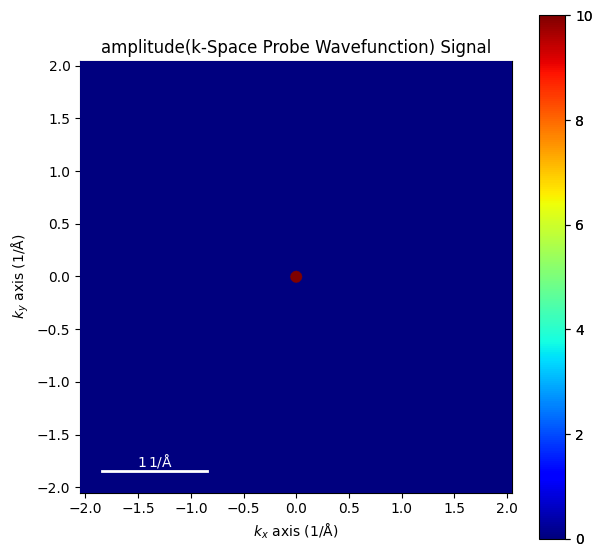

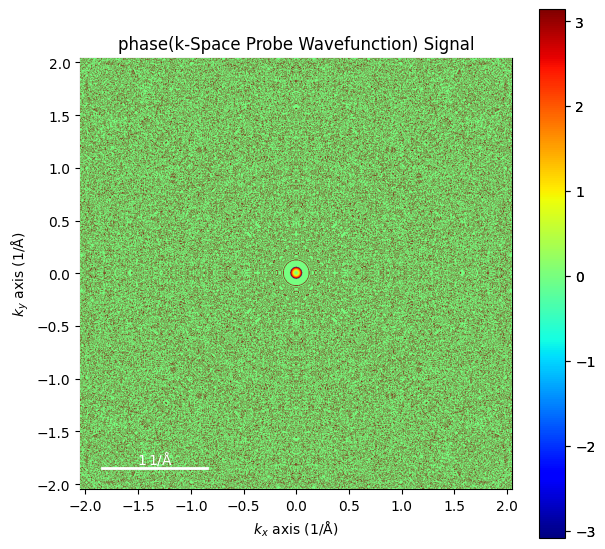

In [63]:
obj_alias = azimuthally_symmetric_discretized_kspace_probe_wavefunction
kwargs = {"representation": "polar",
          "colorbar": True, 
          "scalebar": True, 
          "axes_ticks": True,  
          "vmin": None, 
          "vmax": None, 
          "cmap": plt.get_cmap("jet")}
obj_alias.signal.plot(**kwargs)

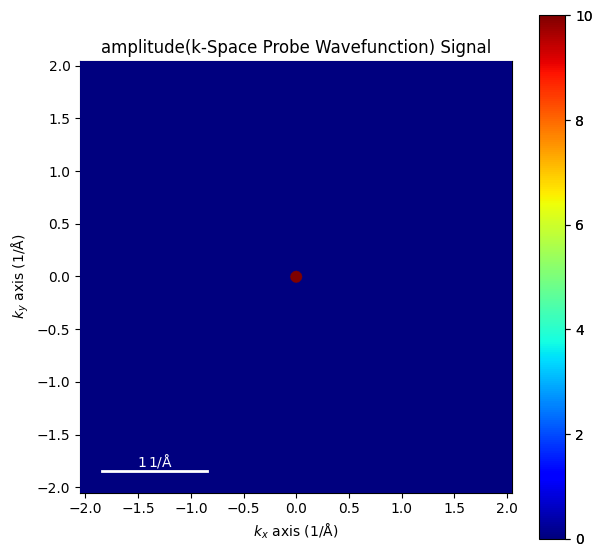

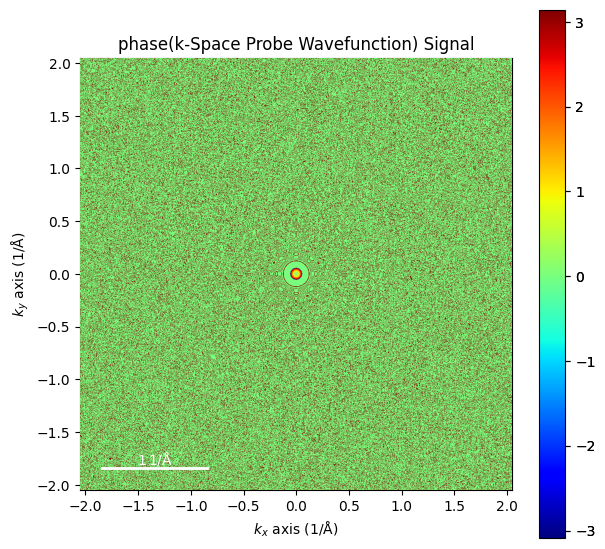

In [64]:
obj_alias = azimuthally_asymmetric_discretized_kspace_probe_wavefunction
kwargs = {"representation": "polar",
          "colorbar": True, 
          "scalebar": True, 
          "axes_ticks": True,  
          "vmin": None, 
          "vmax": None, 
          "cmap": plt.get_cmap("jet")}
obj_alias.signal.plot(**kwargs)

Users can use the tools in the ``empix`` library to process ``hyperspy`` signals
generated by the ``embeam`` library in a variety of ways including calculating
the modulus squared, performing azimuthal averages and integrals over the signal
data, performing annular averages and integrals over the signal data, cropping,
downsampling, and generic resampling. You can find the documentation for the
``empix`` library [here](https://mrfitzpa.github.io/empix/_autosummary/empix.html). 
Note that ``empix`` is automatically installated upon installing ``embeam``.

Note that you must pass probe model parameters of a coherent probe in order to
construct a discretized $k$-space wavefunction object. The following code block
deliberately raises an exception.

In [65]:
kwargs = {"probe_model_params": \
          azimuthally_symmetric_and_incoherent_probe_model_params}
_ = \
    embeam.stem.probe.discretized.kspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify a coherent probe model.

## Using the ``embeam.stem.probe.discretized.kspace.Intensity`` class ##

Here we consider the discretized $k$-space fractional intensities of the four
probes specified above.

In [66]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_k_x, d_k_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_coherent_discretized_kspace_probe_intensity = \
    embeam.stem.probe.discretized.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_k_x, d_k_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_asymmetric_and_coherent_discretized_kspace_probe_intensity = \
    embeam.stem.probe.discretized.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params, 
     "pixel_size": \
     (d_k_x, d_k_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_incoherent_discretized_kspace_probe_intensity = \
    embeam.stem.probe.discretized.kspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_incoherent_probe_model_params, 
     "pixel_size": \
     (d_k_x, d_k_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_asymmetric_and_incoherent_discretized_kspace_probe_intensity = \
    embeam.stem.probe.discretized.kspace.Intensity(**kwargs)

Alternatively, we can construct the discretized $k$-space fractional intensity
objects of the coherent probes from the corresponding discretized $k$-space
wavefunctions objects, which is faster.

In [67]:
obj_alias = \
    azimuthally_symmetric_discretized_kspace_probe_wavefunction
cls_alias = \
    embeam.stem.probe.discretized.kspace.Intensity
azimuthally_symmetric_and_coherent_discretized_kspace_probe_intensity = \
    cls_alias.construct_from_discretized_wavefunction(obj_alias)

obj_alias = \
    azimuthally_asymmetric_discretized_kspace_probe_wavefunction
cls_alias = \
    embeam.stem.probe.discretized.kspace.Intensity
azimuthally_asymmetric_and_coherent_discretized_kspace_probe_intensity = \
    cls_alias.construct_from_discretized_wavefunction(obj_alias)

Note that the ``embeam.stem.probe.discretized.kspace.Intensity`` class is also
updatable, pre-serializable, and de-pre-serializable.

Which discretized $k$-space fractional intensities are azimuthally symmetric?

In [68]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_kspace_probe_intensity

obj_alias.is_azimuthally_symmetric

True

In [69]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_kspace_probe_intensity

obj_alias.is_azimuthally_symmetric

False

In [70]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_kspace_probe_intensity

obj_alias.is_azimuthally_symmetric

True

In [71]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_kspace_probe_intensity

obj_alias.is_azimuthally_symmetric

False

Which discretized $k$-space fractional intensities are those of coherent probes?

In [72]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_kspace_probe_intensity

obj_alias.is_coherent

True

In [73]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_kspace_probe_intensity

obj_alias.is_coherent

True

In [74]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_kspace_probe_intensity

obj_alias.is_coherent

False

In [75]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_kspace_probe_intensity

obj_alias.is_coherent

False

The ``embeam.stem.probe.discretized.kspace.Intensity`` class has an instance
attribute ``signal`` which is set to ``None`` if the construction parameter
``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized $k$-space fractional intensity being
represented. You can find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

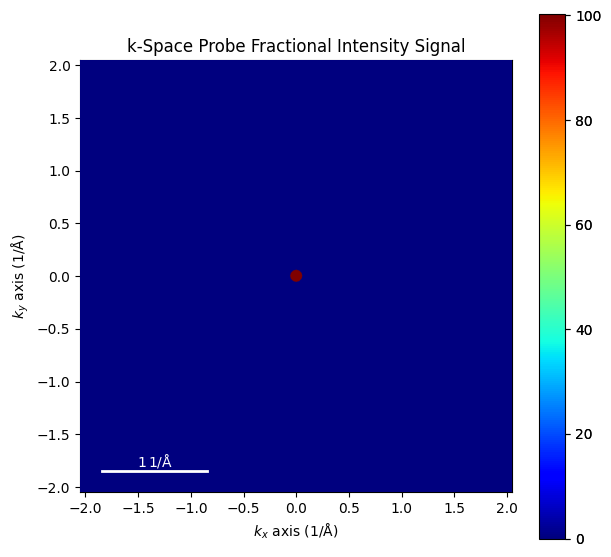

In [76]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_kspace_probe_intensity
kwargs = \
    {"colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

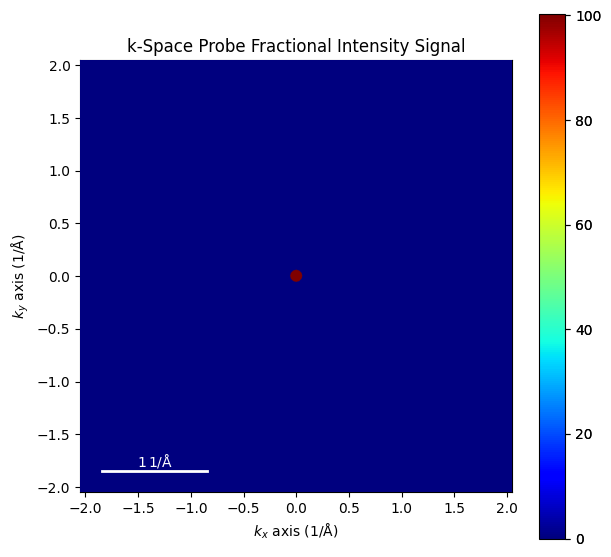

In [77]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_kspace_probe_intensity
kwargs = \
    {"colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

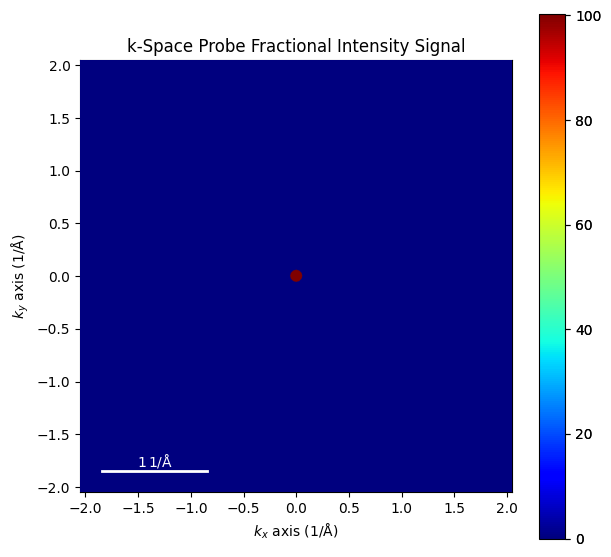

In [78]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_kspace_probe_intensity
kwargs = \
    {"colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

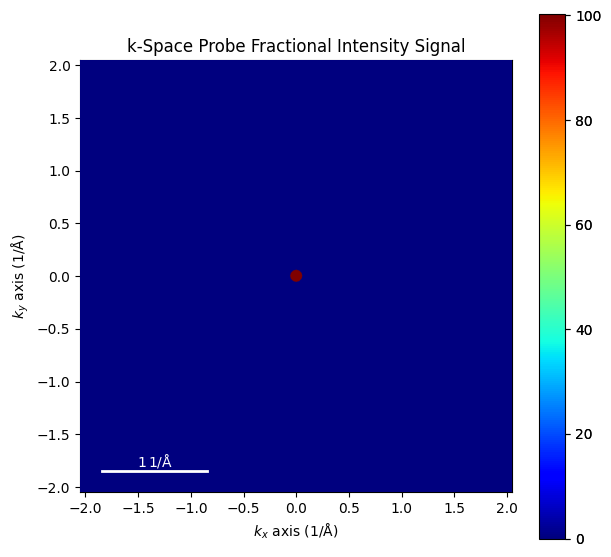

In [79]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_kspace_probe_intensity
kwargs = \
    {"colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

## Using the ``embeam.stem.probe.discretized.symmetric.rspace.Wavefunction`` class ##

Here we consider the discretized $r$-space wavefunction of the probe specified
above that is azimuthally symmetric and coherent.

In [80]:
d_x = L_x / viewer_dims_in_pixels[0]
d_y = L_y / viewer_dims_in_pixels[1]

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_discretized_rspace_probe_wavefunction = \
    embeam.stem.probe.discretized.symmetric.rspace.Wavefunction(**kwargs)

Note that the ``embeam.stem.probe.discretized.symmetric.rspace.Wavefunction``
class is also updatable, pre-serializable, and de-pre-serializable.

The ``embeam.stem.probe.discretized.symmetry.rspace.Wavefunction`` class has an
instance attribute ``signal`` which is set to ``None`` if the construction
parameter ``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized $r$-space wavefunction being represented. You can
find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

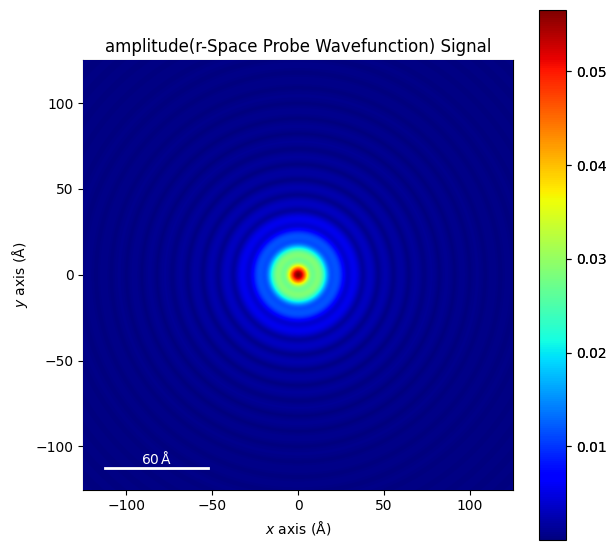

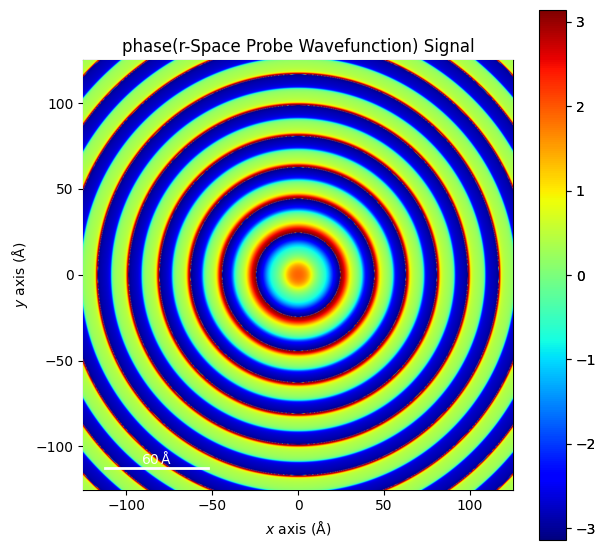

In [81]:
obj_alias = azimuthally_symmetric_discretized_rspace_probe_wavefunction
kwargs = {"representation": "polar",
          "gamma": 0.3,
          "colorbar": True, 
          "scalebar": True, 
          "axes_ticks": True,  
          "vmin": None, 
          "vmax": None, 
          "cmap": plt.get_cmap("jet")}
obj_alias.signal.plot(**kwargs)

Note that you must pass probe model parameters of an azimuthally symmetric and
coherent probe in order to construct a discretized $r$-space wavefunction
object. The following two code blocks deliberately raise exceptions.

In [82]:
kwargs = {"probe_model_params": \
          azimuthally_asymmetric_and_coherent_probe_model_params, 
          "pixel_size": \
          (d_x, d_y), 
          "viewer_dims_in_pixels": \
          viewer_dims_in_pixels}
embeam.stem.probe.discretized.symmetric.rspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric and coherent probe model.

In [83]:
kwargs = {"probe_model_params": \
          azimuthally_symmetric_and_incoherent_probe_model_params, 
          "pixel_size": \
          (d_x, d_y), 
          "viewer_dims_in_pixels": \
          viewer_dims_in_pixels}
embeam.stem.probe.discretized.symmetric.rspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric and coherent probe model.

In order to calculate the $r$-space wavefunction of an azimuthally asymmetric
and coherent probe, one must use the
``embeam.stem.probe.discretized.periodic.rspace.Wavefunction`` class.  Strictly
speaking, this class represents "discretized periodic" $r$-space wavefunctions
of coherent probes. The discretized periodic $r$-space wavefunction of a given
coherent probe samples a function that approximates the exact (continuous)
$r$-space wavefunction of said probe. Only in the limit of arbitrarily small
$r$-space pixel dimensions together with an arbitrarily large number of pixels
horizontally and vertically will the discretized periodic $r$-space wavefunction
sample the exact $r$-space wavefunction. Further below is an example of the
usage of the ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction``
class.

## Using the ``embeam.stem.probe.discretized.symmetric.rspace.Intensity`` class ##

Here we consider the discretized $r$-space fractional intensities of the two
azimuthally symmetric probes specified above. 

Note that the following code block may take several minutes to run since it is,
generally speaking, computationally intensive to calculate discretized $r$-space
fractional intensities of incoherent probes. A faster alternative is to
approximate the discretized $r$-space fractional intensities by their periodic
counterparts using the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class, the tradeoff
being that unphysical artifacts are introduced into the approximation due to the
periodic boundary conditions. However, these unphysical artifacts can be
controlled and minimized by adjusting the dimensions of the unit cell of the
probe of interest. Further below is an example of the usage of the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class.

In [84]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_coherent_discretized_rspace_probe_intensity = \
    embeam.stem.probe.discretized.symmetric.rspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_incoherent_discretized_rspace_probe_intensity = \
    embeam.stem.probe.discretized.symmetric.rspace.Intensity(**kwargs)

Alternatively, we can construct the discretized $r$-space fractional intensity
object of the azimuthally symmetric and coherent probe from the corresponding
discretized $r$-space wavefunctions object, which is faster.

In [85]:
obj_alias = \
    azimuthally_symmetric_discretized_rspace_probe_wavefunction
cls_alias = \
    embeam.stem.probe.discretized.symmetric.rspace.Intensity
azimuthally_symmetric_and_coherent_discretized_rspace_probe_intensity = \
    cls_alias.construct_from_discretized_wavefunction(obj_alias)

Note that the ``embeam.stem.probe.discretized.symmetric.rspace.Intensity`` class
is also updatable, pre-serializable, and de-pre-serializable.

The ``embeam.stem.probe.discretized.symmetry.rspace.Intensity`` class has an
instance attribute ``signal`` which is set to ``None`` if the construction
parameter ``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized $r$-space fractional intensity being
represented. You can find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

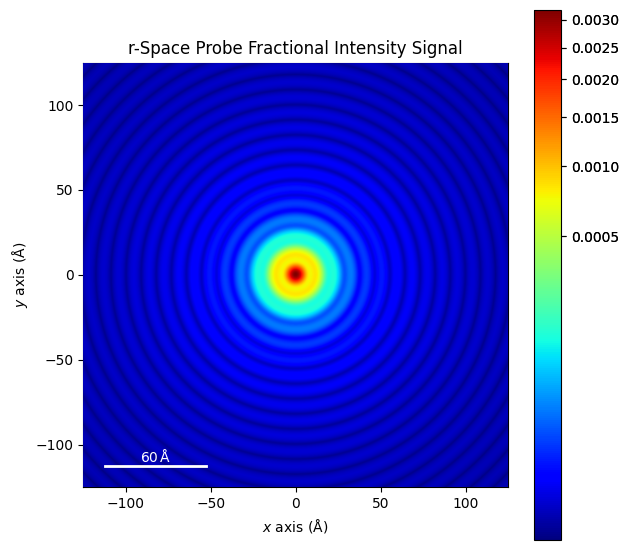

In [86]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

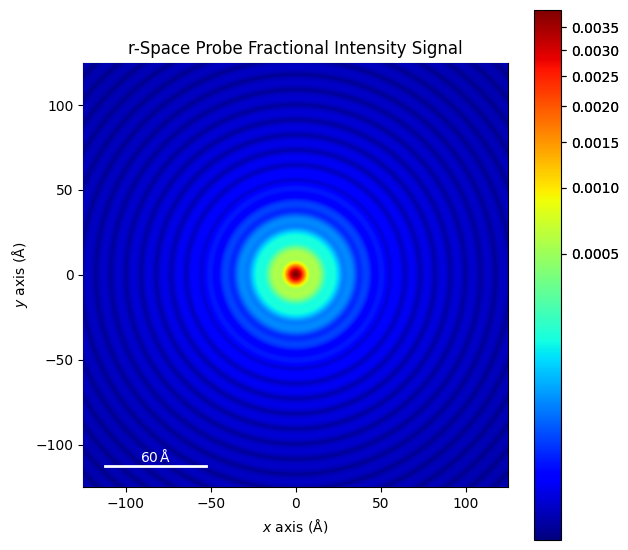

In [87]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

Note that you must pass probe model parameters of an azimuthally symmetric probe
in order to construct a discretized $r$-space fractional intensity object. The
following code block deliberately raises an exception.

In [88]:
kwargs = {"probe_model_params": \
          azimuthally_asymmetric_and_incoherent_probe_model_params, 
          "pixel_size": \
          (d_x, d_y), 
          "viewer_dims_in_pixels": \
          viewer_dims_in_pixels}
embeam.stem.probe.discretized.symmetric.rspace.Intensity(**kwargs)

ValueError: The object ``probe_model_params`` must specify an azimuthally symmetric probe model.

In order to calculate the $r$-space fractional intensity of an azimuthally
asymmetric probe, one must use the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class. Strictly
speaking, this class represents "discretized periodic" $r$-space fractional
intensities of probes. The discretized periodic $r$-space fractional intensity
of a given probe samples a function that approximates the exact (continuous)
$r$-space fractional intensity of said probe. Only in the limit of arbitrarily
small $r$-space pixel dimensions together with an arbitrarily large number of
pixels horizontally and vertically will the discretized periodic $r$-space
fractional intensity sample the exact $r$-space fractional intensity. Further
below is an example of the usage of the
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class.

## Using the ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction`` class ##

Here we consider the discretized periodic $r$-space wavefunctions of the two
coherent probes specified above.

In the limit of arbitrarily small $r$-space pixel dimensions together with
arbitrarily large unit cell dimensions, the discretized periodic $r$-space
wavefunctions sample the exact $r$-space wavefunctions of the two coherent
probes.

In [89]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_discretized_periodic_rspace_probe_wavefunction = \
    embeam.stem.probe.discretized.periodic.rspace.Wavefunction(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_asymmetric_discretized_periodic_rspace_probe_wavefunction = \
    embeam.stem.probe.discretized.periodic.rspace.Wavefunction(**kwargs)

Note that the ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction``
class is also updatable, pre-serializable, and de-pre-serializable.

Which discretized periodic $r$-space wavefunctions are azimuthally symmetric?

In [90]:
obj_alias = \
    azimuthally_symmetric_discretized_periodic_rspace_probe_wavefunction

obj_alias.is_azimuthally_symmetric

True

In [91]:
obj_alias = \
    azimuthally_asymmetric_discretized_periodic_rspace_probe_wavefunction

obj_alias.is_azimuthally_symmetric

False

The ``embeam.stem.probe.discretized.periodic.rspace.Wavefunction`` class has an
instance attribute ``signal`` which is set to ``None`` if the construction
parameter ``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized periodic $r$-space wavefunction being
represented. You can find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

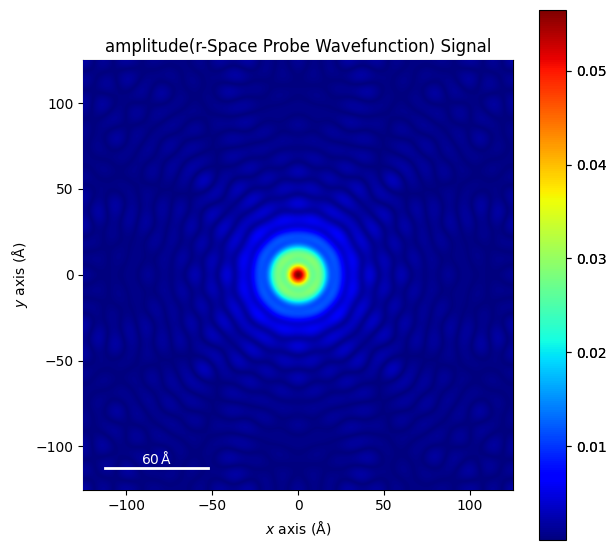

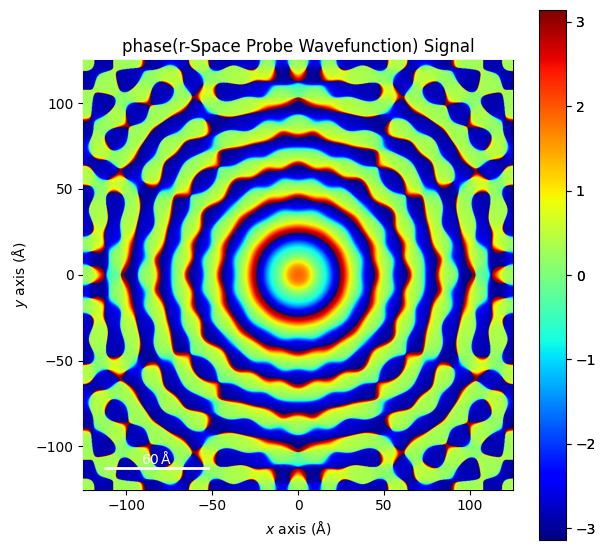

In [92]:
obj_alias = \
    azimuthally_symmetric_discretized_periodic_rspace_probe_wavefunction
kwargs = \
    {"representation": "polar",
     "gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

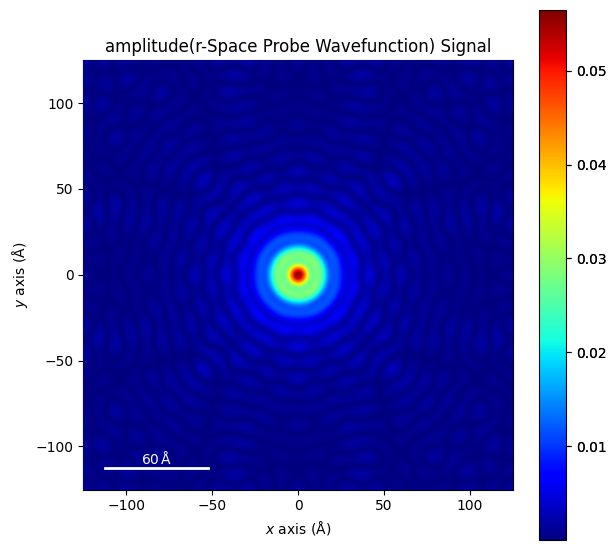

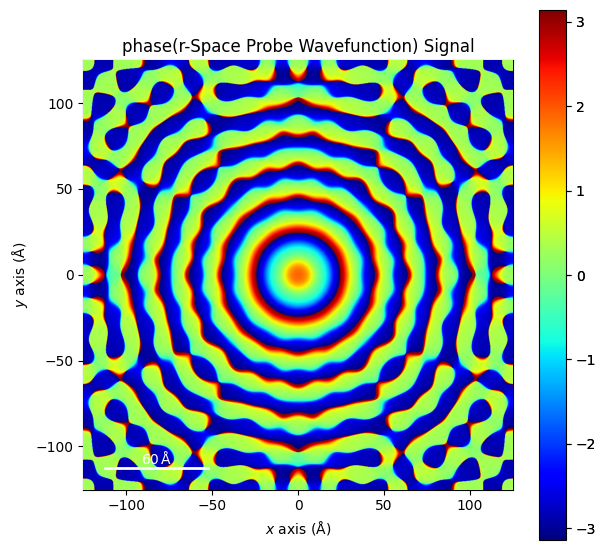

In [93]:
obj_alias = \
    azimuthally_asymmetric_discretized_periodic_rspace_probe_wavefunction
kwargs = \
    {"representation": "polar",
     "gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

Note that you must pass probe model parameters of a coherent probe in order to
construct a discretized periodic $r$-space wavefunction object. The following
code block deliberately raises an exceptions.

In [94]:
kwargs = {"probe_model_params": \
          azimuthally_symmetric_and_incoherent_probe_model_params, 
          "pixel_size": \
          (d_x, d_y), 
          "viewer_dims_in_pixels": \
          viewer_dims_in_pixels}
embeam.stem.probe.discretized.periodic.rspace.Wavefunction(**kwargs)

ValueError: The object ``probe_model_params`` must specify a coherent probe model.

## Using the ``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class ##

Here we consider the discretized periodic $r$-space fractional intensities of
the four probes specified above.

In the limit of arbitrarily small $r$-space pixel dimensions together with
arbitrarily large unit cell dimensions, the discretized periodic $r$-space
fractional intensities sample the exact $r$-space fractional intensities of the
four probes.

In [95]:
kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity = \
    embeam.stem.probe.discretized.periodic.rspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_coherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity = \
    embeam.stem.probe.discretized.periodic.rspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_symmetric_and_incoherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity = \
    embeam.stem.probe.discretized.periodic.rspace.Intensity(**kwargs)

kwargs = \
    {"probe_model_params": \
     azimuthally_asymmetric_and_incoherent_probe_model_params, 
     "pixel_size": \
     (d_x, d_y), 
     "viewer_dims_in_pixels": \
     viewer_dims_in_pixels}
azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity = \
    embeam.stem.probe.discretized.periodic.rspace.Intensity(**kwargs)

Alternatively, we can construct the discretized $r$-space fractional intensity
object of the azimuthally symmetric and coherent probe from the corresponding
discretized $r$-space wavefunctions object, which is faster.

In [96]:
cls_alias = \
    embeam.stem.probe.discretized.periodic.rspace.Intensity

obj_alias = \
    azimuthally_symmetric_discretized_periodic_rspace_probe_wavefunction
azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity = \
    cls_alias.construct_from_discretized_wavefunction(obj_alias)

obj_alias = \
    azimuthally_asymmetric_discretized_periodic_rspace_probe_wavefunction
azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity = \
    cls_alias.construct_from_discretized_wavefunction(obj_alias)

Note that the ``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class
is also updatable, pre-serializable, and de-pre-serializable.

Which discretized periodic $r$-space fractional intensities are azimuthally
symmetric?

In [97]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_azimuthally_symmetric

True

In [98]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_azimuthally_symmetric

False

In [99]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_azimuthally_symmetric

True

In [100]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_azimuthally_symmetric

False

Which discretized periodic $r$-space fractional intensities are those of
coherent probes?

In [101]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_coherent

True

In [102]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_coherent

True

In [103]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_coherent

False

In [104]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity

obj_alias.is_coherent

False

The ``embeam.stem.probe.discretized.periodic.rspace.Intensity`` class has an
instance attribute ``signal`` which is set to ``None`` if the construction
parameter ``viewer_dims_in_pixels`` satisfies
``viewer_dims_in_pixels[0]*viewer_dims_in_pixels[1]==0``, otherwise it is set to
a ``hyperspy`` signal that stores the data and metadata of, and visualization
methods for the discretized periodic $r$-space fractional intensity being
represented. You can find the documentation for the ``hyperspy`` library
[here](https://hyperspy.org/hyperspy-doc/current/index.html).

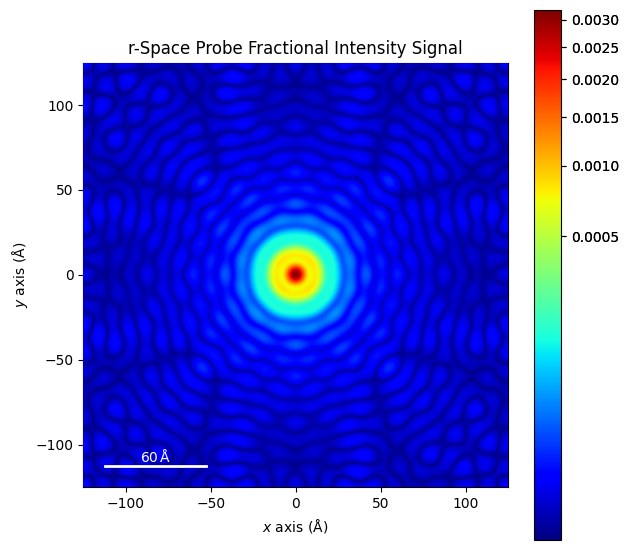

In [105]:
obj_alias = \
    azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

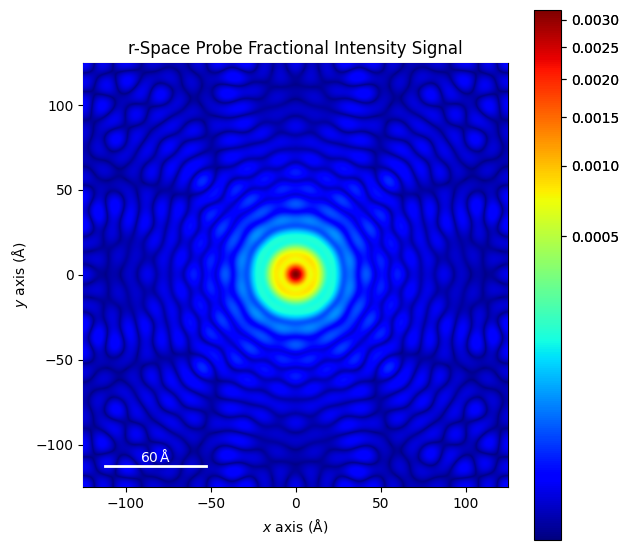

In [106]:
obj_alias = \
    azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

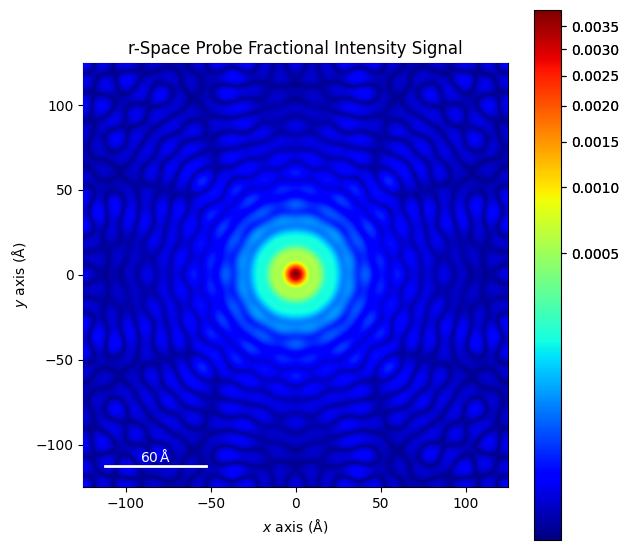

In [107]:
obj_alias = \
    azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

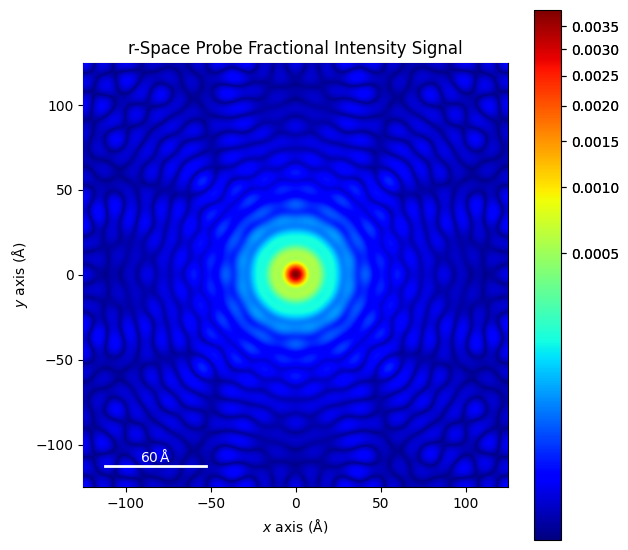

In [108]:
obj_alias = \
    azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"gamma": 0.3,
     "colorbar": True, 
     "scalebar": True, 
     "axes_ticks": True,  
     "vmin": None, 
     "vmax": None, 
     "cmap": plt.get_cmap("jet")}
_ = \
    obj_alias.signal.plot(**kwargs)

## Using the ``embeam.stem.probe.resolution.rise_distance`` function ##

Here we estimate the rise-distance measure of the spatial resolution of the four
probes specified above, for two different values of the "rise".

For each of the azimuthally symmetric probes, there are two ways we can estimate
the rise-distance measure of the spatial resolution: 1. Pass an instance of
``embeam.stem.probe.discretized.symmetric.rspace.Intensity`` which represents
the discretized $r$-space fractional intensity that samples the exact
(continuous) $r$-space fractional intensity of the probe; 2. Pass an instance of
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` which represents the
discretized periodic $r$-space fractional intensity that samples a function that
approximates the exact (continuous) $r$-space fractional intensity of the
probe. The former is more accurate than the latter since the latter introduces
unphysical artifacts in the calculation as a result of the imposed periodic
boundary conditions. However, in the limit of arbitrarily small $r$-space pixel
dimensions together with an arbitrarily large number of pixels horizontally and
vertically will the discretized periodic $r$-space fractional intensity sample
the exact $r$-space fractional intensity of the probe, thus the aforementioned
unphysical artifacts are controllable and can be made arbitrarily small in
principle. The advantage of using the latter approach is that it is much faster
to construct an instance of
``embeam.stem.probe.discretized.periodic.rspace.Intensity`` than an instance of
``embeam.stem.probe.discretized.symmetric.rspace.Intensity`` for the same
construction parameters.

In [109]:
# Approach #1 for the azimuthally symmetric and coherent probe.
discretized_rspace_intensity = \
    azimuthally_symmetric_and_coherent_discretized_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(9.880192828178588, 17.44342292092999)

In [110]:
# Approach #2 for the azimuthally symmetric and coherent probe.
discretized_rspace_intensity = \
    azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(10.103226162028356, 17.788322892088566)

In [111]:
# Approach #1 for the azimuthally symmetric and incoherent probe.
discretized_rspace_intensity = \
    azimuthally_symmetric_and_incoherent_discretized_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(9.22702168746002, 17.61084536833554)

In [112]:
# Approach #2 for the azimuthally symmetric and incoherent probe.
discretized_rspace_intensity = \
    azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(9.416565438363143, 18.017430400040418)

For each of the azimuthally asymmetric probes, one must use the second approach
mentioned above to estimate the rise-distance measure of the spatial resolution.
Note that the Python function ``embeam.stem.probe.resolution.rise_distance`` is
slow for the azimuthally asymmetric probes, compared to azimuthally symmetric
probes.

In [113]:
# For the azimuthally asymmetric and coherent probe.
discretized_rspace_intensity = \
    azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(9.95485972918596, 17.601903887851023)

In [114]:
# For the azimuthally asymmetric and incoherent probe.
discretized_rspace_intensity = \
    azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "rise": (40, 60)}
rise_distance = \
    embeam.stem.probe.resolution.rise_distance(**kwargs)

rise_distance  # In units of Å.

(9.31831321730161, 17.817982450803196)

## Using the ``embeam.stem.probe.resolution.information`` function ##

Here we estimate the information resolution of the four probes specified above,
for two signal-to-noise ratios.

Because the calculation of the information resolution is prohibitively expensive
in terms of computational time when periodic boundary conditions are not
imposed, the Python function ``embeam.stem.probe.resolution.information``
accepts as input only instances
``embeam.stem.probe.discretized.periodic.rspace.Intensity``.

In [115]:
discretized_rspace_intensity = \
    azimuthally_symmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "signal_to_noise_ratio": (25, 50)}
R_inf = \
    embeam.stem.probe.resolution.information(**kwargs)

R_inf  # In units of Å.

(6.481916268636632, 5.439339538510327)

In [116]:
discretized_rspace_intensity = \
    azimuthally_symmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "signal_to_noise_ratio": (25, 50)}
R_inf = \
    embeam.stem.probe.resolution.information(**kwargs)

R_inf  # In units of Å.

(6.1789101628911105, 5.228099628551364)

In [117]:
discretized_rspace_intensity = \
    azimuthally_asymmetric_and_coherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "signal_to_noise_ratio": (25, 50)}
R_inf = \
    embeam.stem.probe.resolution.information(**kwargs)

R_inf  # In units of Å.

(8.48233635889673, 6.929352789011703)

In [118]:
discretized_rspace_intensity = \
    azimuthally_asymmetric_and_incoherent_discretized_periodic_rspace_probe_intensity
kwargs = \
    {"discretized_rspace_intensity": discretized_rspace_intensity, 
     "signal_to_noise_ratio": (25, 50)}
R_inf = \
    embeam.stem.probe.resolution.information(**kwargs)

R_inf  # In units of Å.

(9.017485859581967, 7.289631590317398)